In [21]:
import pandas as pd

In [45]:
file_path = 'ranked/ranked.csv'

# Read the CSV file into a DataFrame
ranked_dataframe = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(ranked_dataframe.head())

             Namn  Rank FMCK Skövde  Rank Tidaholms MK  Rank Töreboda MK  \
0  Hugo Andersson               6.0                3.0               1.0   
1     Per Korsell               NaN                NaN               NaN   
2    Olof Backman               NaN                NaN               4.0   
3   William Almén               3.0                7.0               2.0   
4     Niklas Mörk              11.0                5.0               3.0   

   Rank Carlsborgs MK  Rank Falköpings MK  Rank Tibro MK         Klass  \
0                 1.0                 2.0            NaN     Ungdom E1   
1                 NaN                 4.0            2.0  Motion 40-49   
2                 NaN                 NaN            NaN     Ungdom E1   
3                 4.0                11.0            1.0     Ungdom E1   
4                 3.0                 3.0            4.0    Motion -39   

          Klubb   AvgRank  
0      Tibro MK  2.600000  
1     Götene MK  3.000000  
2  Karlskoga E

In [46]:
def display_row_by_name(name):
    row = ranked_dataframe[ranked_dataframe['Namn'] == name]
    if not row.empty:
        print(row)
    else:
        print(f"No data found for '{name}'.")

# Example: Displaying row for a specific name
display_row_by_name('Robert Ahlin')

             Namn  Rank FMCK Skövde  Rank Tidaholms MK  Rank Töreboda MK  \
197  Robert Ahlin             125.0                NaN             128.0   

     Rank Carlsborgs MK  Rank Falköpings MK  Rank Tibro MK         Klass  \
197                 NaN               100.0          108.0  Motion 40-49   

             Klubb  AvgRank  
197  Falköpings MK   115.25  


Show line chart for selected riders.

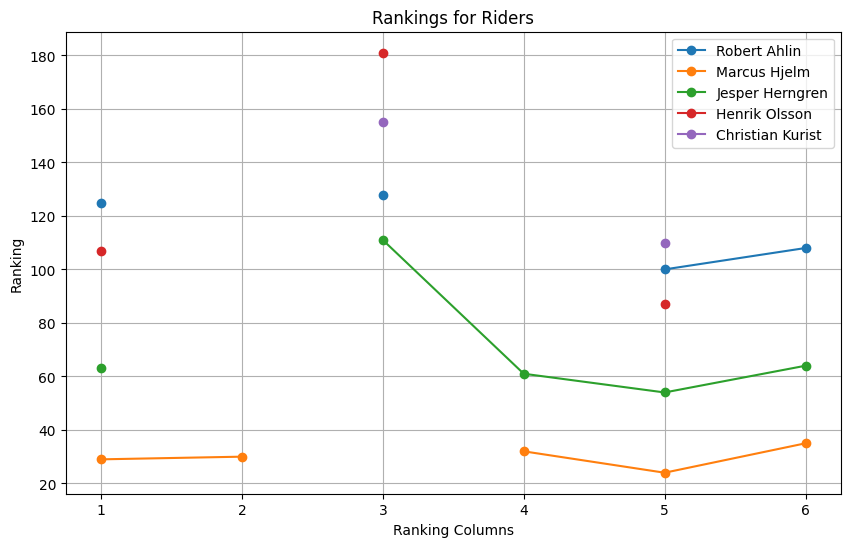

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot rankings for specific riders
def plot_rankings(dataframe, rider_names):
    plt.figure(figsize=(10, 6))

    for rider_name in rider_names:
        # Filter data for the rider
        rider_data = dataframe[dataframe['Namn'] == rider_name]

        # Get ranking columns
        ranking_columns = [col for col in rider_data.columns if col.startswith('Rank')]

        # Convert columns to numeric using .loc to avoid SettingWithCopyWarning
        for col in ranking_columns:
            rider_data.loc[:, col] = pd.to_numeric(rider_data[col], errors='coerce')


        # Extract rider's rankings
        rankings = rider_data[ranking_columns].fillna(np.nan).values.flatten().astype(float)

        # Plot rankings as a line chart for each rider
        plt.plot(range(1, len(rankings) + 1), rankings, marker='o', label=rider_name)

    plt.xlabel('Ranking Columns')
    plt.ylabel('Ranking')
    plt.title('Rankings for Riders')
    plt.legend()
    plt.grid(True)  # Add grid lines
    plt.show()

# Example: Plot rankings for multiple riders
riders_to_plot = ['Robert Ahlin', 'Marcus Hjelm', 'Jesper Herngren', 'Henrik Olsson', 'Christian Kurist']
plot_rankings(ranked_dataframe, riders_to_plot)

In [48]:
# Get unique Klubb values from ranked_dataframe
unique_klubbs = ranked_dataframe['Klubb'].unique()
print(unique_klubbs)

['Tibro MK' 'Götene MK' 'Karlskoga EK' 'SMK Värnamo' 'Laxå MK'
 'Huskvarna MK' 'Försvarsmaktens EK' 'Tidaholms MK' 'Göta MS'
 'Hallsbergs MK' 'Djursdala SK' 'FMCK Skövde' 'Carlsborgs MK'
 'Ulricehamns MK' 'Älvbygdens MK' 'Linköpings MS' 'Norrahammars MK'
 'Örebro EK' 'SMK Vingåker' 'Team Westom Motorcykel' 'Kullings MS'
 'Bengtsfors MCC' 'FMCK Hässleholm' 'Karlstad MX Klubb' 'SMK Kolmården'
 'Wäxjö MS' 'Vimmerby MS' 'Mariestads EK' 'Tranås MS' 'FMCK Borås'
 'Falköpings MK' 'Stenungsunds MS' 'Hjo MK' 'Ma Lerum' 'Skene MS'
 'Kinds MK' 'SMK Vadstena' 'SMK Trollhättan' 'Lilla Edets MCK'
 'Hagfors MS' 'Töreboda MK' 'Kortedala MK'
 'Kristdala Motorsällskap, Kristdala MS' 'Åbågen MCK' 'SMK Ronneby'
 'Eds-Skottbacka MX Förening' 'Varbergs MK' 'MK Ran' 'Flittig Enduro'
 'MK Team Treske' 'Vissefjärda EK' 'Borås MK' 'SMK Ljungby'
 'Gotlands MF:s Motorcykelklubb' 'Bodafors MK' 'Finspångs MS'
 'FMCK BohusDal' 'Björkö EK' 'SMC' 'BMK Uddevalla' 'SMK Östgöta'
 'Lidköpings MCK' 'MSK Hammaren' 'Kungsbac

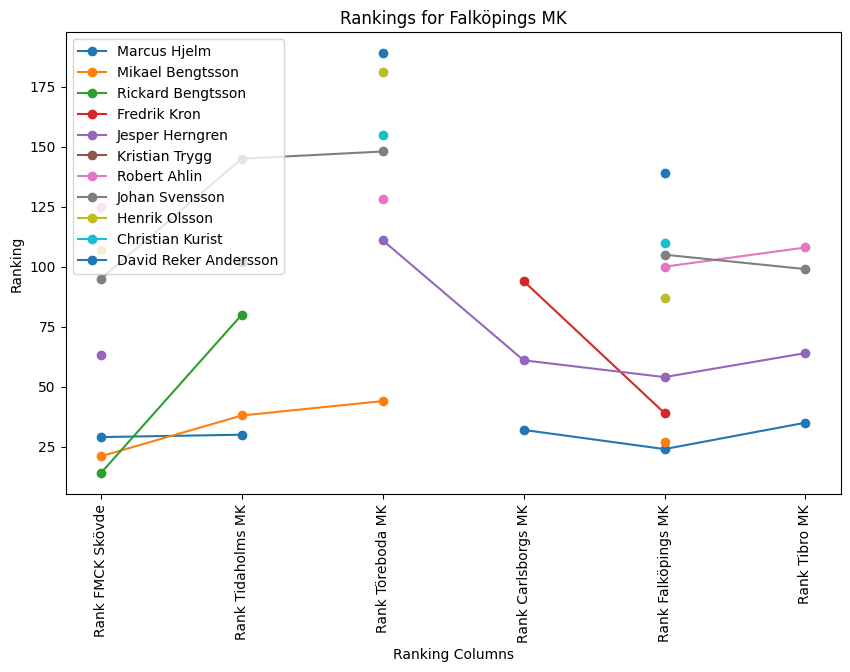

In [51]:
import matplotlib.pyplot as plt

# Select a specific Klubb
selected_klubb = 'Falköpings MK'

# Filter data for the selected Klubb
klubb_data = ranked_dataframe[ranked_dataframe['Klubb'] == selected_klubb]

# Get all 'Namn' values for the selected Klubb
namn_values = klubb_data['Namn'].tolist()

# Extract column names for Rank values (finding columns starting with 'Rank')
rank_columns = [col for col in klubb_data.columns if col.startswith('Rank')]

# Plot Rank values for each 'Namn' in the selected Klubb
plt.figure(figsize=(10, 6))

for namn in namn_values:
    # Filter data for each 'Namn'
    rider_data = klubb_data[klubb_data['Namn'] == namn][rank_columns].values.flatten()
    
    # Plot the 'Rank' values for each 'Namn'
    plt.plot(rank_columns, rider_data, marker='o', label=namn)

plt.xlabel('Ranking Columns')
plt.ylabel('Ranking')
plt.title(f'Rankings for {selected_klubb}')
plt.legend()
plt.xticks(rank_columns, rotation=90)  # Set the x-axis ticks to Rank column names
plt.show()